# Supervised Learning

## Models to be Included

- Decision Tree Classification
- Random Forest Classification
- Support Vector Classification
- K-Nearest Neighbours
- AdaBoost 
- BaggingClassifier 
- ExtraTreesClassifier
- GradientBoost
- HistogramGradientBoost

### Importing the dataset and encoding the target variable

In [4]:
import pandas as pd
data=pd.read_csv('features_3_sec.csv/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
data=data.drop(columns=['filename','length'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['label']=lc.fit_transform(data['label'])
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0


### Scaling the dataset

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in data.drop(columns='label',axis=1):
    data[i]=sc.fit_transform(data[[i]])
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,...,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781,0
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,...,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425,0
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,...,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458,0
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,...,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744,0
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,...,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692,0


In [9]:
X=data.drop(columns='label',axis=1)
Y=data['label']

### Performing train-test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 100)

### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
ds=DecisionTreeClassifier()
ds.fit(X_train,y_train)
pram_dict={"criterion":['gini','entropy'],
           "max_depth":range(3,21),
           "min_samples_leaf":range(4,8)}
grid=GridSearchCV(ds,param_grid=pram_dict,cv=5,verbose=3,n_jobs=-1,refit=True)
grid.fit(X_train,y_train)
best_dt_model = grid.best_estimator_
print(grid.best_params_)
print("accuracy", grid.best_score_)
print("val_accuracy", accuracy_score(y_test, best_dt_model.predict(X_test)))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 4}
accuracy 0.6324899964311316
val_accuracy 0.6566566566566566


### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_grid_params = { 
    'n_estimators': [500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(4, 10, 2),
    'criterion' :['gini', 'entropy'],
    'max_features' : ['sqrt']
}
rfc = RandomForestClassifier()
rf_grid = GridSearchCV(rfc, param_grid=rf_grid_params, refit = True, verbose=3)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
print(rf_grid.best_params_)
print("accuracy", rf_grid.best_score_)
print("val_accuracy", accuracy_score(y_test, best_rf_model.predict(X_test)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.568 total time=  17.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.539 total time=  17.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.553 total time=  16.9s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.561 total time=  16.9s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.559 total time=  16.8s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000;, score=0.570 total time=  34.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000;, score=0.544 total time=  34.8s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000;, score=0.550 total time=  33.4s
[CV 4/5] END criterion=gini, max_depth=4, max_fe

### Support Vector Classifier

In [13]:
from sklearn.svm import SVC
scv=SVC()
scv.fit(X_train,y_train)
svm_grid_params = {'C': [10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid=svm_grid_params,verbose=3,refit=True)
svm_grid.fit(X_train, y_train)
best_svm_model = svm_grid.best_estimator_
print(svm_grid.best_params_)
print("accuracy", svm_grid.best_score_)
print("val_accuracy", accuracy_score(y_test, best_svm_model.predict(X_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.229 total time=   4.9s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.241 total time=   4.9s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.247 total time=   4.9s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.238 total time=   4.9s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.252 total time=   5.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.828 total time=   4.6s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.833 total time=   4.6s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.844 total time=   4.7s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.847 total time=   4.6s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.845 total time=   4.6s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.873 total time=   1.7s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;,

### K-Nearest Neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train.values,y_train)
knn_grid_params = {'n_neighbors': np.arange(3, 10, 2),
                'metric':['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid_params,verbose=3,refit=True)
knn_grid.fit(X_train.values, y_train)
best_knn_model = knn_grid.best_estimator_
print(knn_grid.best_params_)
print("accuracy", knn_grid.best_score_)
print("val_accuracy", accuracy_score(y_test, best_knn_model.predict(X_test.values)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.859 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;, score=0.851 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=3;, score=0.859 total time=   0.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=3;, score=0.874 total time=   0.0s
[CV 5/5] END ...metric=euclidean, n_neighbors=3;, score=0.884 total time=   0.0s
[CV 1/5] END ...metric=euclidean, n_neighbors=5;, score=0.836 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=5;, score=0.836 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=5;, score=0.840 total time=   0.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=5;, score=0.856 total time=   0.0s
[CV 5/5] END ...metric=euclidean, n_neighbors=5;, score=0.867 total time=   0.0s
[CV 1/5] END ...metric=euclidean, n_neighbors=7;, score=0.831 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=7;,

### Ensemble Models
- AdaBoost 
- BaggingClassifier 
- ExtraTreesClassifier
- GradientBoost
- HistogramGradientBoost

In [27]:
#importing the functions
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score, jaccard_score, log_loss

In [28]:
#creating a comparision dataframe
compare = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "AUC", "F1", "Jaccard", "Log-Loss"], 
                       index=["AdaBoost","BaggingClf","ExtraTrees","GradientBoost","HistGB"])

#function to add the metrics to the dataframe
def add_eval(y,yh,modes,model,xte):
    compare.loc[modes]['Accuracy'] = accuracy_score(y,yh)
    compare.loc[modes]['Precision'] = precision_score(y,yh,average='macro')
    compare.loc[modes]['Recall'] = recall_score(y,yh,average='macro')
    compare.loc[modes]['AUC'] = roc_auc_score(y,model.predict_proba(xte),multi_class='ovr')
    compare.loc[modes]['F1'] = f1_score(y,yh,average='macro')
    compare.loc[modes]['Jaccard'] = jaccard_score(y,yh,average='macro')
    compare.loc[modes]['Log-Loss'] = log_loss(y,model.predict_proba(xte))

In [29]:
#AdaBoost
adbc = AdaBoostClassifier(estimator=RandomForestClassifier(),n_estimators=100, learning_rate=1)
adbc.fit(X_train, y_train)
y_pred = adbc.predict(X_test)
add_eval(y_test, y_pred, "AdaBoost",model = adbc, xte=X_test)

#Bagging Classifier
bcl = BaggingClassifier(estimator =SVC(C=1.0, kernel='rbf', degree=3, gamma='scale'),n_estimators=20,)
bcl.fit(X_train, y_train)
y_pred = bcl.predict(X_test)
add_eval(y_test, y_pred, "BaggingClf", model = bcl, xte=X_test)

#Gradient Boosting
gbc = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
add_eval(y_test, y_pred, "GradientBoost", model = gbc, xte=X_test)

#Histogram Boosting
histc = HistGradientBoostingClassifier(loss ='log_loss', learning_rate=0.9, max_iter=300, scoring='loss')
histc.fit(X_train, y_train)
yred = histc.predict(X_test)
add_eval(y_test, y_pred, "HistGB", model = histc, xte=X_test)

#Extra-Trees Classifier
extr = ExtraTreesClassifier(n_estimators=100, criterion='gini')
extr.fit(X_train, y_train)
ypred = extr.predict(X_test)
add_eval(y_test, y_pred, "ExtraTrees", model = extr, xte=X_test)

In [30]:
compare

,Accuracy,Precision,Recall,AUC,F1,Jaccard,Log-Loss
AdaBoost,0.880547,0.881201,0.880573,0.989742,0.879547,0.786827,0.714243
BaggingClf,0.851518,0.850767,0.850576,0.961596,0.850235,0.743226,2.433746
ExtraTrees,0.847181,0.848348,0.846914,0.989044,0.846893,0.737594,0.786165
GradientBoost,0.847181,0.848348,0.846914,0.987348,0.846893,0.737594,0.462749
HistGB,0.847181,0.848348,0.846914,0.519049,0.846893,0.737594,31.437284


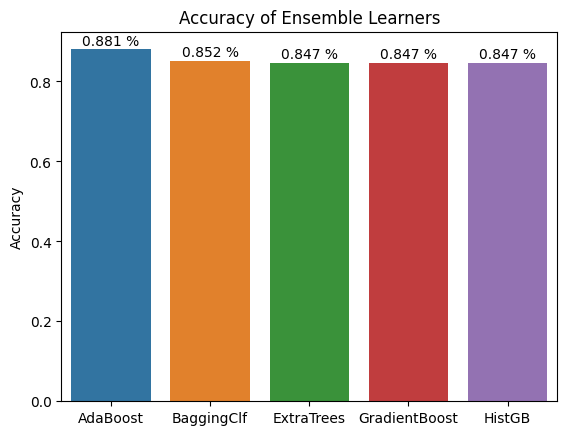

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plots = sns.barplot(x=compare.index, y=compare.Accuracy)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f')+" %", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.title("Accuracy of Ensemble Learners")
plt.show()

# End